# Sector 3

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Import Data

In [2]:
data = get_output('../output_log/s3.txt')
print(len(data))
metadata = pd.read_csv('/storage/astro2/phrdhx/tesslcs/sector3lookup.csv')
print(len(metadata[metadata.Magnitude < 13]))

224783
224783


In [3]:
data = data[data.transit_prob == 'maybeTransit']
print(len(data), f"after maybeTransit, {round(len(data)/len(metadata[metadata.Magnitude < 13]),3)*100}% candidates remain")
data.head()

110391 after maybeTransit, 49.1% candidates remain


,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
5,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,92227402,-3.68862,-3.44431,1401.16218,1.00158,0.00607,1.43747,-1.37066,2.931217e+03,...,679,39.03691,38.95687,1.95185,1.94784,0.00123,0.00123,0.00105,0.00105,maybeTransit
10,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,100101927,-6.12980,-3.00384,1399.03539,0.99287,0.00112,0.50093,29.79574,5.490933e+01,...,577,140.26158,135.48733,0.79694,0.76981,0.00101,0.00101,0.00083,0.00084,maybeTransit
11,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,164718481,-5.81471,-5.20491,1393.95357,1.20741,0.00007,0.09039,-25.81162,6.350201e+02,...,333,12.40184,10.84814,0.62009,0.54241,0.00017,0.00016,0.00012,0.00010,maybeTransit
14,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,300939409,-3.36331,-1.40068,1399.28080,0.94804,0.00000,15.31233,25.26662,1.164831e+07,...,589,389.56192,411.63181,1.60976,1.70096,0.00012,0.00012,0.00009,0.00010,maybeTransit
15,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,231724994,-4.53645,-3.81131,1399.78268,1.00000,0.00016,0.00644,-1.53398,1.313700e-01,...,613,45.70023,45.70023,1.75770,1.75770,0.00133,0.00133,0.00098,0.00098,maybeTransit


## Removing worst anomalies

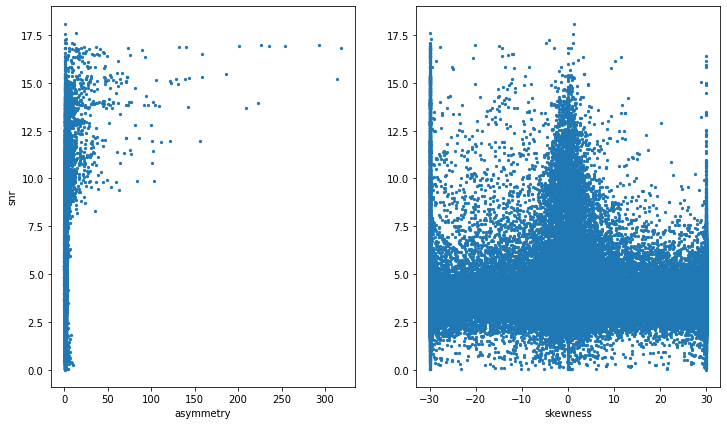

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [5]:
# for i in data.loc[abs(data.skewness >= 10) & abs(data.skewness <= 20)].path.head(): #4 x 4 grid for illustration purposes
#     lc, lc_info = import_XRPlightcurve(i,sector=6)
#     lc = lc['time','corrected flux','quality','flux error']
#     _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

In [6]:
data = data[(data.asym_score <= 3)].reset_index(drop=True)
data.head()

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
0,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,92227402,-3.68862,-3.44431,1401.16218,1.00158,0.00607,1.43747,-1.37066,2.931217e+03,...,679,39.03691,38.95687,1.95185,1.94784,0.00123,0.00123,0.00105,0.00105,maybeTransit
1,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,100101927,-6.12980,-3.00384,1399.03539,0.99287,0.00112,0.50093,29.79574,5.490933e+01,...,577,140.26158,135.48733,0.79694,0.76981,0.00101,0.00101,0.00083,0.00084,maybeTransit
2,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,164718481,-5.81471,-5.20491,1393.95357,1.20741,0.00007,0.09039,-25.81162,6.350201e+02,...,333,12.40184,10.84814,0.62009,0.54241,0.00017,0.00016,0.00012,0.00010,maybeTransit
3,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,300939409,-3.36331,-1.40068,1399.28080,0.94804,0.00000,15.31233,25.26662,1.164831e+07,...,589,389.56192,411.63181,1.60976,1.70096,0.00012,0.00012,0.00009,0.00010,maybeTransit
4,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,231724994,-4.53645,-3.81131,1399.78268,1.00000,0.00016,0.00644,-1.53398,1.313700e-01,...,613,45.70023,45.70023,1.75770,1.75770,0.00133,0.00133,0.00098,0.00098,maybeTransit


### Distribution of Asymmetry vs SNR, and Skewness vs SNR

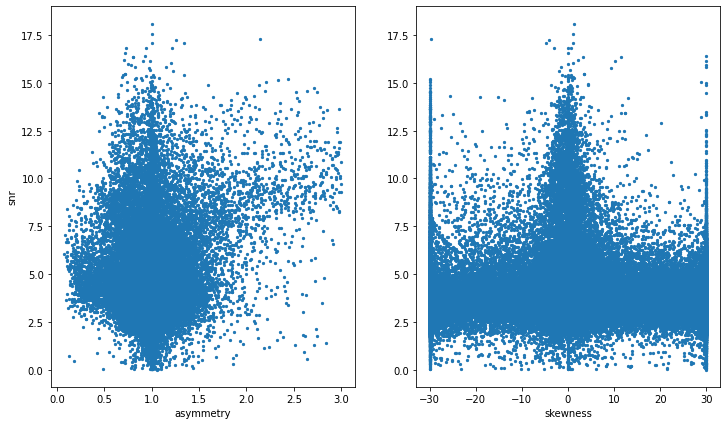

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

#### Histogram of time and duration

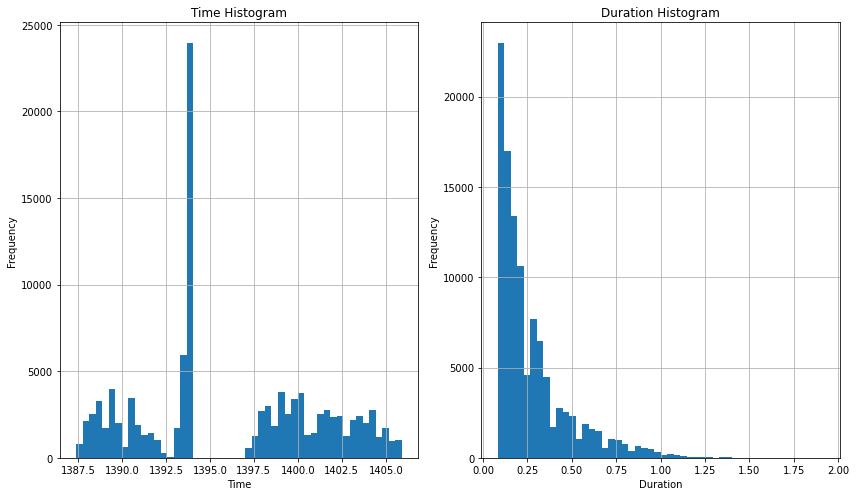

In [8]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

#### 2D Histogram of time and duration

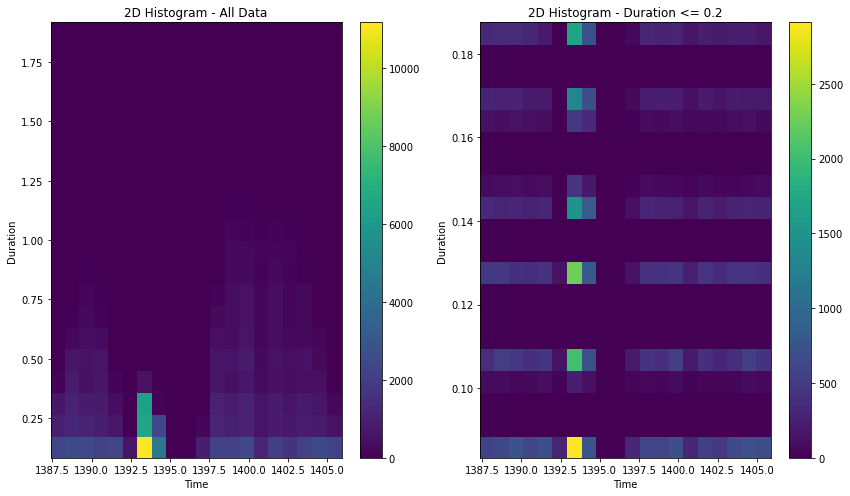

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first hist2d on the first subplot
h1 = ax1.hist2d(data['time'], data['duration'], bins=[20, 20])
ax1.set_title('2D Histogram - All Data')
ax1.set_xlabel('Time')
ax1.set_ylabel('Duration')
plt.colorbar(h1[3], ax=ax1)

# Plot the second hist2d on the second subplot
filtered_data = data[data.duration <= 0.2]
h2 = ax2.hist2d(filtered_data['time'], filtered_data['duration'], bins=[20, 20])
ax2.set_title('2D Histogram - Duration <= 0.2')
ax2.set_xlabel('Time')
ax2.set_ylabel('Duration')
plt.colorbar(h2[3], ax=ax2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Alternative visualisation

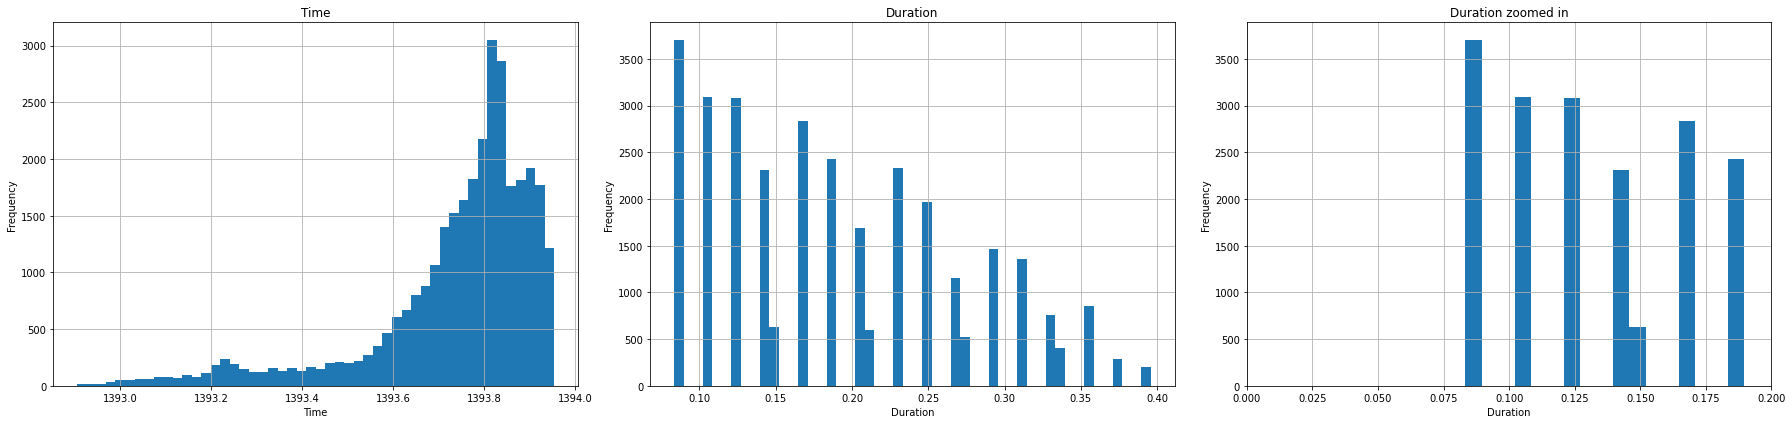

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,6))

# Plot the first histogram on the first subplot
data.loc[(data.time >= 1392.5) & (data.time <= 1395)].hist('time', bins=50, ax=ax1)
ax1.set_title('Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Frequency')

# Plot the second histogram on the second subplot
data.loc[(data.time >= 1392.5) & (data.time <= 1395)].hist('duration', bins=50, ax=ax2)
ax2.set_title('Duration')
ax2.set_xlabel('Duration')
ax2.set_ylabel('Frequency')

data.loc[(data.time >=1392.5) & (data.time <= 1395)].hist('duration',bins=50,ax=ax3)
ax3.set_title('Duration zoomed in')
ax3.set_xlabel('Duration')
ax3.set_ylabel('Frequency')
ax3.set_xlim([0,0.2])

plt.tight_layout()
plt.show()

There is a second spike around 0.3 days... Proven in `asym_score vs depth` plots

In [11]:
data.drop(data[(data['duration'] <= 0.15) & (data['time'] >= 1473.433) & (data['time'] <= 1473.5)].index,inplace=True)

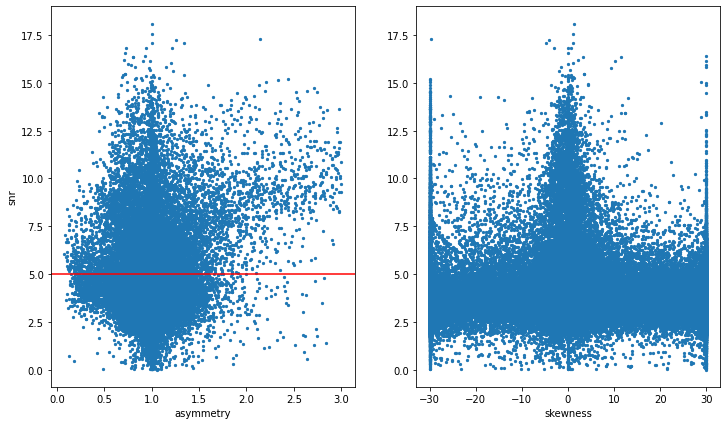

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
ax[0].axhline(5,c='red')

plt.show()

In [13]:
# for i in data[(data.time >=1392.5) & (data.time <=1395)].path.head(10): #4 x 4 grid for illustration purposes
#     lc, lc_info = import_XRPlightcurve(i,sector=3)
#     plt.figure(figsize=(12,5))
#     plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
#     plt.title(f' TIC {lc_info[0]}')
#     plt.show()

---

## SNR cut

In [14]:
data_new = data[abs(data.snr) >= 5].reset_index(drop=True)

In [15]:
len(data_new[data_new.asym_score <= 0.2])

72

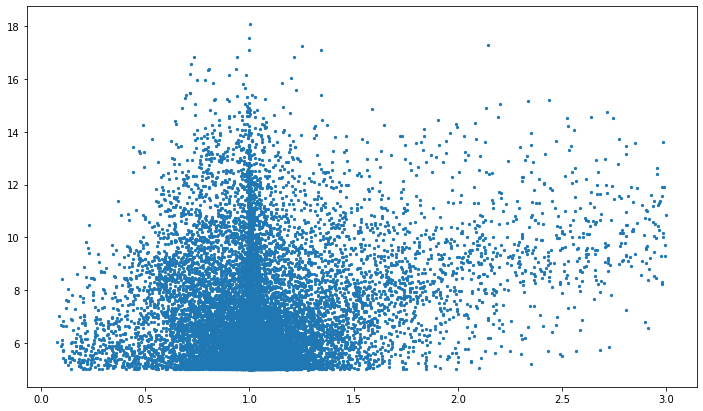

In [16]:
plt.scatter(data_new['asym_score'],abs(data_new.snr),s=5)

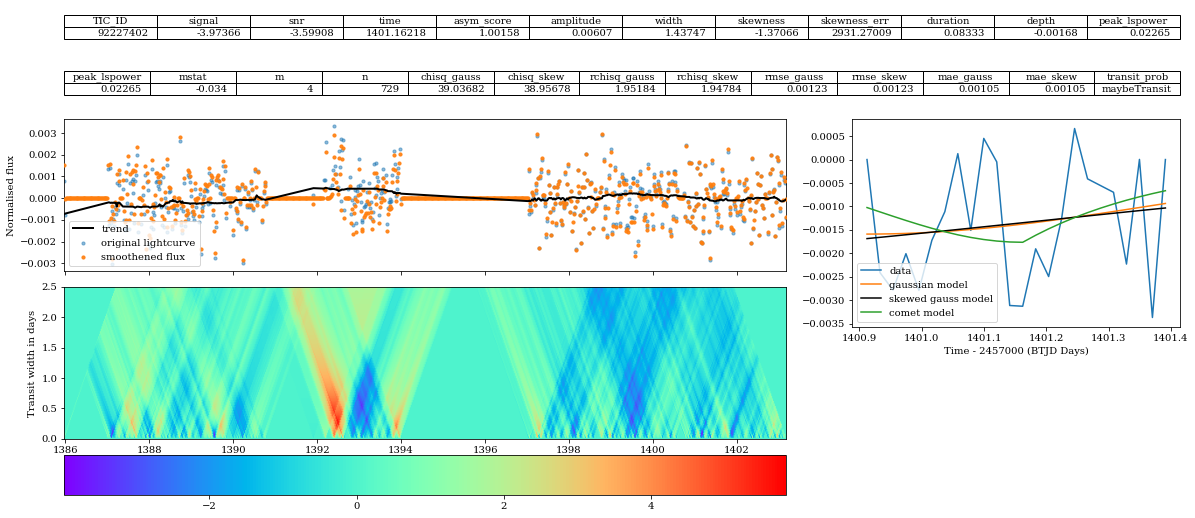

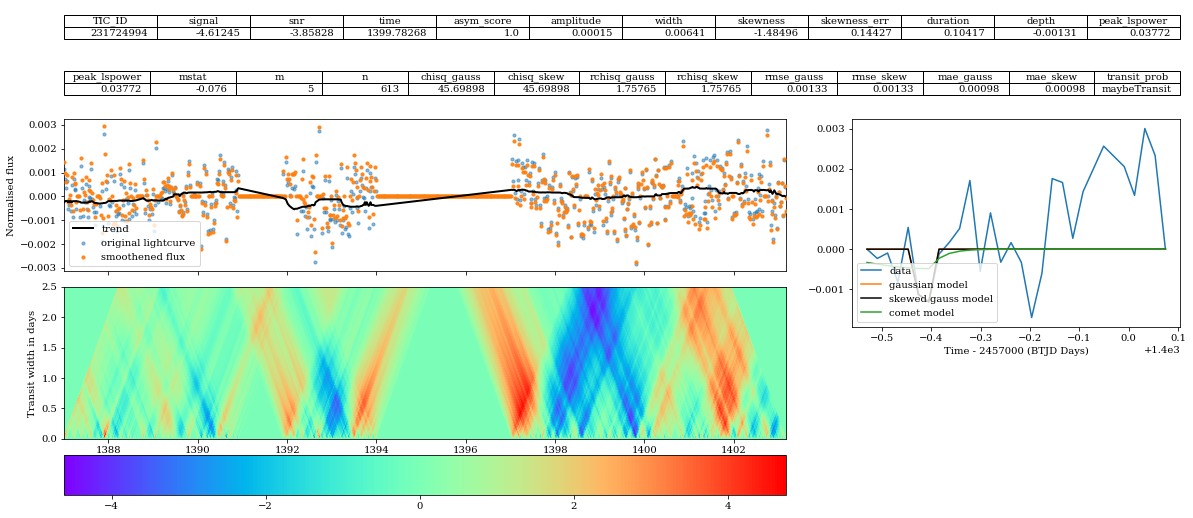

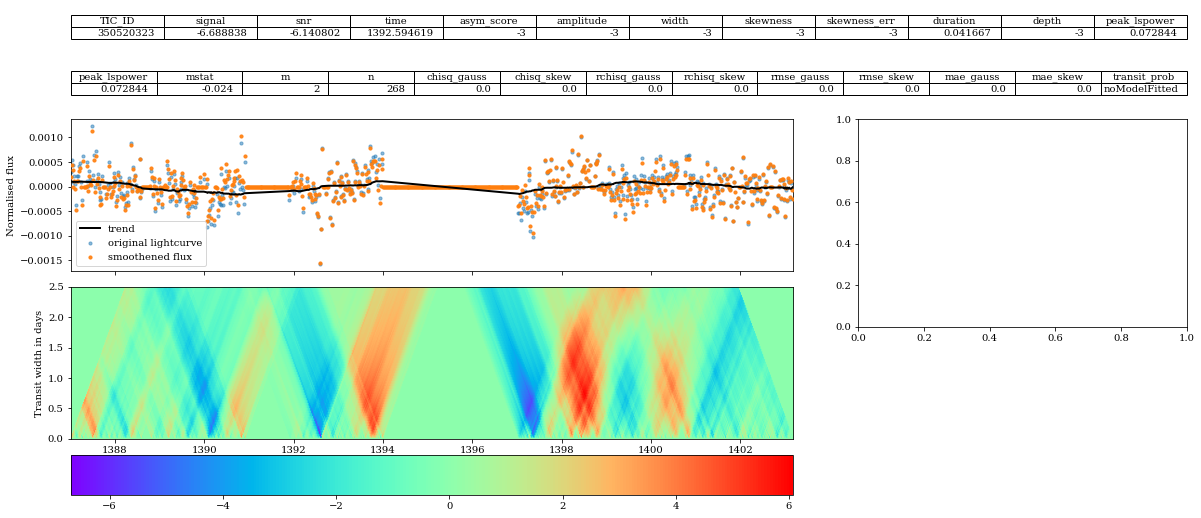

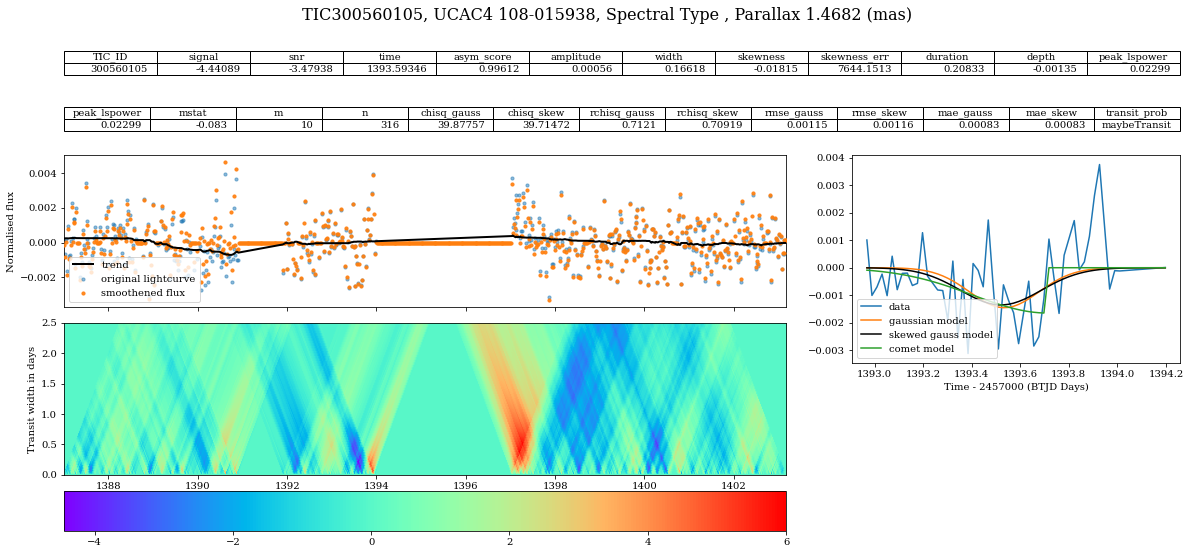

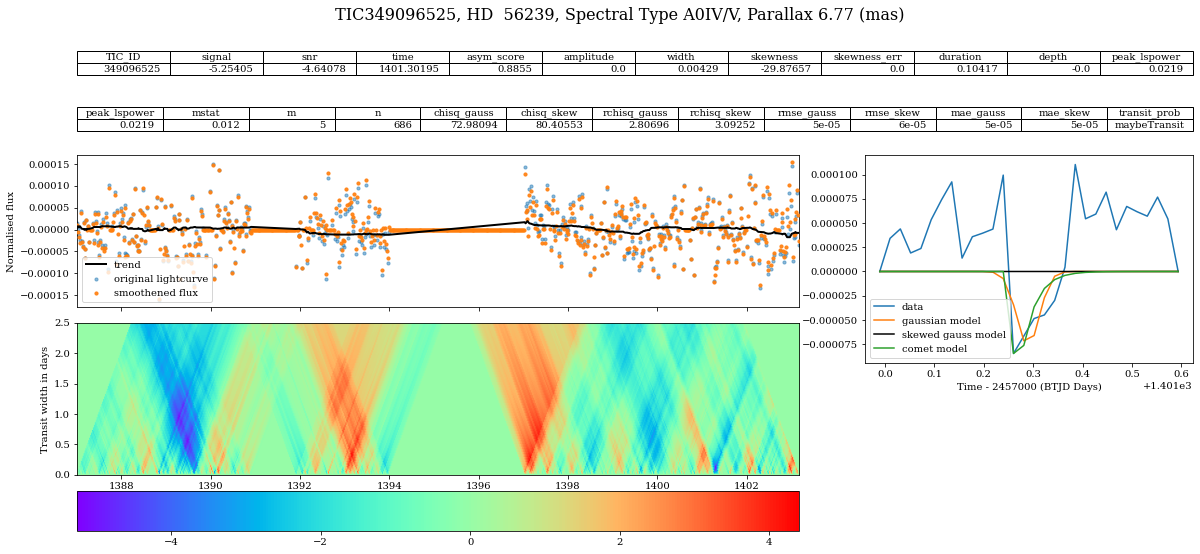

In [17]:
for i in data.loc[abs(data.asym_score >= 1) & abs(data.asym_score <= 1.2)].path.head(): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

---
## Other property cuts

### Import EB catalogue

In [18]:
ebs = pd.read_csv('../eb_cat.txt')
tois = pd.read_csv('../exofop_tess_tois.csv')

tois = tois.reset_index()
tois = tois['level_0'][1:]
tois = tois.values.astype(int)



In [19]:
data_new

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
0,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,164718481,-5.81471,-5.20491,1393.95357,1.20741,0.00007,0.09039,-25.81162,635.02014,...,333,12.40184,10.84814,0.62009,0.54241,0.00017,0.00016,0.00012,0.00010,maybeTransit
1,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,176982068,-27.76734,-10.07487,1393.76054,0.97123,0.00618,0.13758,-1.84715,0.50932,...,324,145.51720,102.34974,2.13996,1.50514,0.00220,0.00223,0.00120,0.00115,maybeTransit
2,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,215336208,-8.52826,-6.00629,1393.84776,0.69905,0.00055,0.38942,7.22909,8.66885,...,328,38.43616,37.18902,0.48045,0.46486,0.00035,0.00042,0.00022,0.00033,maybeTransit
3,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,272235688,-12.84984,-5.27985,1393.76007,1.43104,0.00055,0.27096,-24.22453,26.62857,...,324,271.34619,205.25816,3.66684,2.77376,0.00039,0.00032,0.00026,0.00021,maybeTransit
4,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,268638567,-9.03819,-6.15643,1393.91196,1.53271,0.00035,0.23015,-30.00000,86.92828,...,331,75.83563,52.56062,1.72354,1.19456,0.00031,0.00025,0.00022,0.00019,maybeTransit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,300327632,-18.39965,-11.27523,1393.71856,1.00266,0.00084,0.05683,-1.04433,2.25535,...,322,134.95797,134.65957,3.06723,3.06044,0.00151,0.00151,0.00104,0.00103,maybeTransit
16745,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,197934807,-5.57031,-5.19117,1393.28348,0.83770,0.00000,0.17000,-29.95676,8.63932,...,301,55.20229,65.79152,1.10405,1.31583,0.00049,0.00054,0.00039,0.00045,maybeTransit
16746,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,146710800,-5.88806,-5.22980,1388.68082,1.01019,0.00018,0.07479,2.94809,3.65280,...,80,17.34877,17.12086,0.86744,0.85604,0.00047,0.00047,0.00034,0.00034,maybeTransit
16747,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,287832650,-7.42068,-5.47999,1393.71830,1.07286,0.00066,0.00845,24.62798,0.00000,...,322,1731.13086,1612.75111,86.55654,80.63756,0.00460,0.00444,0.00295,0.00271,maybeTransit


In [20]:
ebs_found = data_new[data_new['TIC_ID'].isin(ebs['ID'])]
tois_found =  data_new[data_new['TIC_ID'].isin(tois)]

In [21]:
# Step 1: Create a boolean mask
data_new['is_eb'] = data_new['TIC_ID'].isin(ebs['ID'])
data_new['is_toi'] = data_new['TIC_ID'].isin(tois)

In [22]:
log_peak_power = np.log10(data_new['peak_lspower'])
log_depth = np.log10(abs(data_new['depth']))

In [23]:
len(data_new)

16749

### Duration vs depth

In [24]:
frac_dur = data_new.duration[(data_new.is_eb == False) & (data_new.is_toi == False)]
frac_depth = data_new.depth[(data_new.is_eb == False) & (data_new.is_toi == False)]

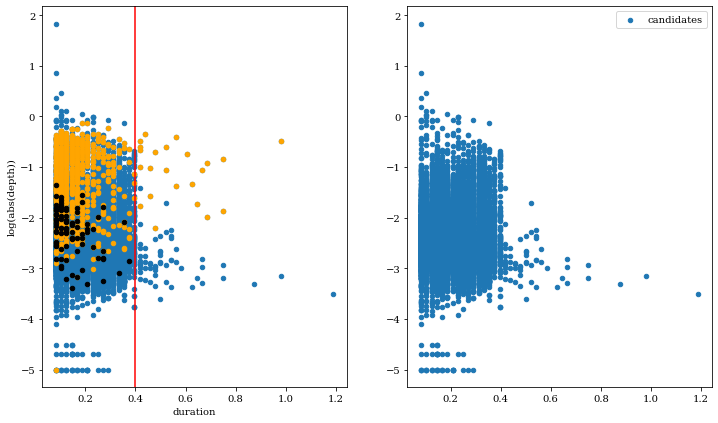

In [25]:
fig, ax = plt.subplots(ncols=2)

ax[0].scatter(data_new.duration,log_depth,s=20,label='candidates',zorder=1)
ax[0].scatter(ebs_found.duration,np.log10(abs(ebs_found['depth'])),c='orange',s=20,label='ebs')
ax[0].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois')

ax[1].scatter(frac_dur,np.log10(abs(frac_depth)),s=20,label='candidates',zorder=1)
#ax[1].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois')



ax[0].set_xlabel('duration')
ax[0].set_ylabel('log(abs(depth))')
ax[0].axvline(0.4,c='red')

plt.legend()

### Duration vs Peak_lspower

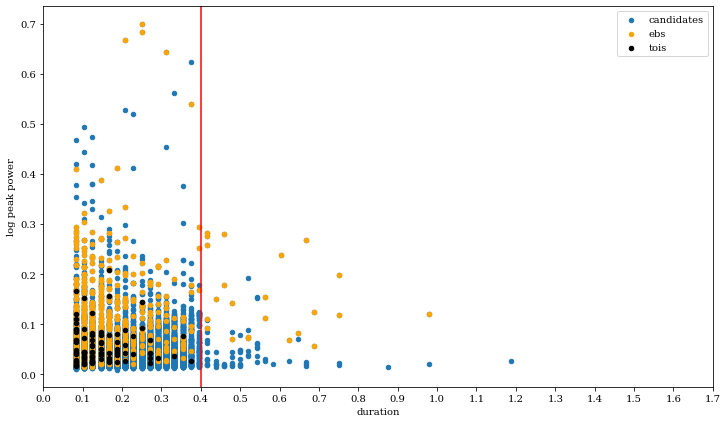

In [26]:
plt.scatter(data_new.duration,data_new.peak_lspower,s=20,label='candidates')
plt.scatter(ebs_found.duration,ebs_found.peak_lspower,c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,tois_found.peak_lspower,c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

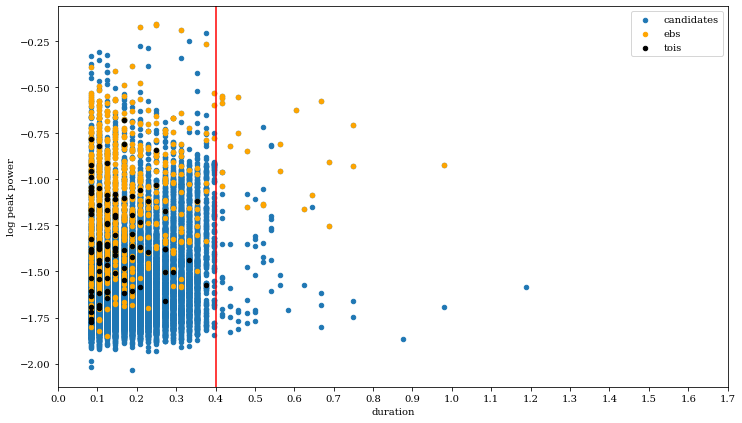

In [27]:
plt.scatter(data_new.duration,log_peak_power,s=20,label='candidates')
plt.scatter(ebs_found.duration,np.log10(ebs_found['peak_lspower']),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,np.log10(tois_found['peak_lspower']),c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

In [27]:
crossref_tot = (ebs_found.duration) + (tois_found.duration) / data_new.duration
crosref_ebs = (ebs_found.duration) / data_new.duration
cross_ref_toi = (tois_found.duration) / data_new.duration

### duration vs SNR

Text(0, 0.5, 'snr')

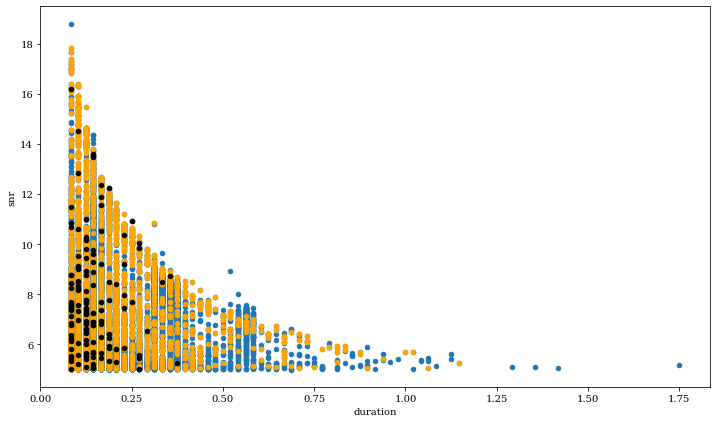

In [28]:
plt.scatter(data_new.duration,abs(data_new.snr),s=20,label='candidates')
plt.scatter(ebs_found.duration,abs(ebs_found.snr),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,abs(tois_found.snr),c='black',s=20,label='tois')
plt.xlabel('duration')
plt.ylabel('snr')

### asymmetry vs depth

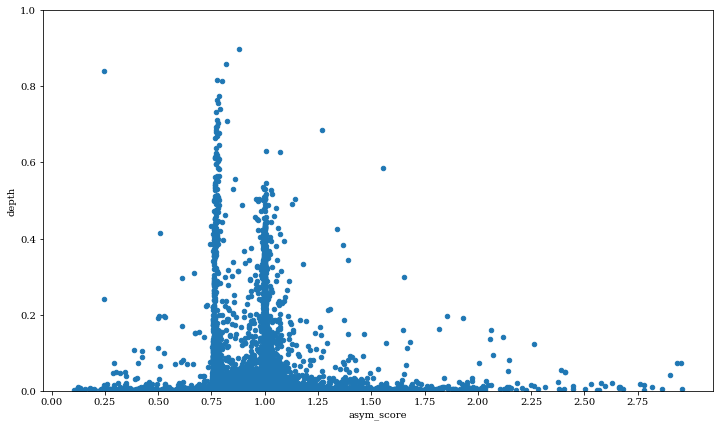

In [29]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates')
plt.ylim([0,1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.show()

In [30]:
test = data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)]

#### Explore spike at ~0.8

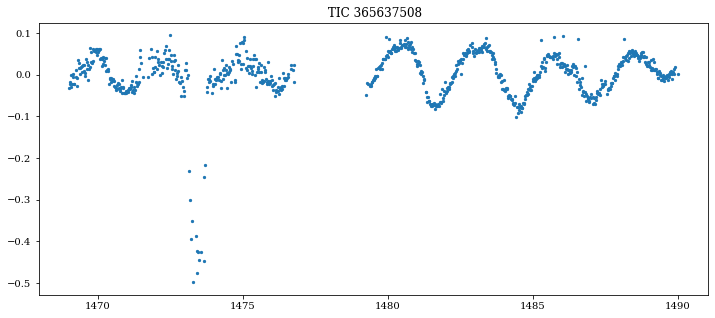

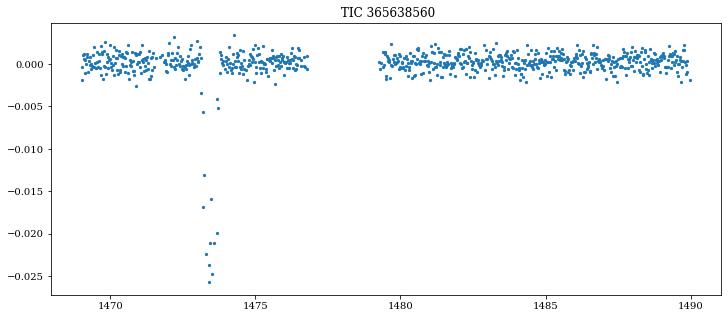

In [31]:
for i in data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)].path.head(2): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

### Spike at `asym_score ~ 1`

Expected. But nevertheless, let's see

759


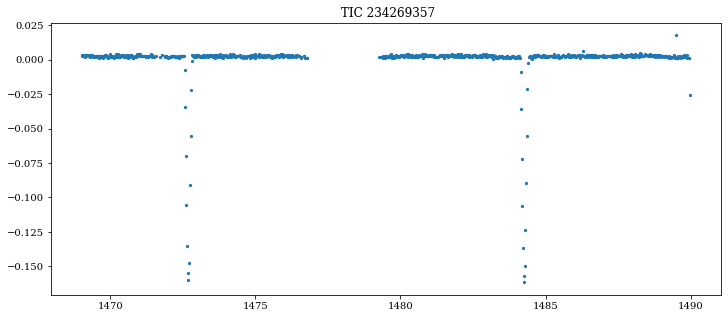

759


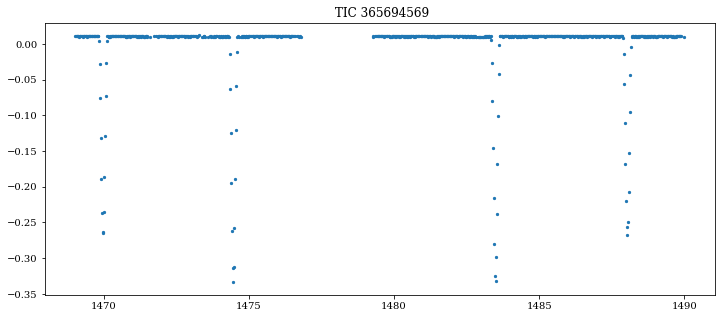

In [32]:
for i in data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)].path.head(2): #4 x 4 grid for illustration purposes
    print(len(data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)]))
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

### Make cut on 0.4 day duration

In [33]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

In [34]:
data_new.head()

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,is_eb,is_toi
21,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,119689578,-9.93499,-6.53815,1480.97420,0.99246,0.00124,0.37095,4.61365,6.52792,...,1031.33758,6.47775,6.52745,0.00197,0.00198,0.00124,0.00126,maybeTransit,False,False
24,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,119689952,-9.53722,-5.49828,1480.99504,1.02597,0.00121,0.33495,-30.00000,130.49315,...,693.74974,4.04766,3.94176,0.00182,0.00179,0.00113,0.00113,maybeTransit,False,False
28,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,365746782,-19.35356,-7.31018,1473.41228,0.95881,0.00372,0.31883,6.52423,2.95372,...,923.93038,7.20287,5.84766,0.00213,0.00218,0.00106,0.00109,maybeTransit,False,False
31,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,365747781,-9.05362,-5.25317,1473.39141,0.91312,0.00072,0.17278,-0.32598,9.07848,...,126.97013,0.74804,0.69764,0.00051,0.00054,0.00041,0.00042,maybeTransit,False,False
42,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,229172474,-17.04166,-6.50876,1473.41228,0.89494,0.00165,0.16819,0.00134,434604.85926,...,968.87502,6.74347,6.13212,0.00113,0.00120,0.00073,0.00076,maybeTransit,False,False


### asym_score vs depth
depth spike at 0.3 days gone. 
- Most if not all the failed lightcurves should have been cut now.

In [35]:
from matplotlib.colors import ListedColormap

In [36]:
bin_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a']

# Create a ListedColormap using the specific colors
custom_cmap = ListedColormap(bin_colors)

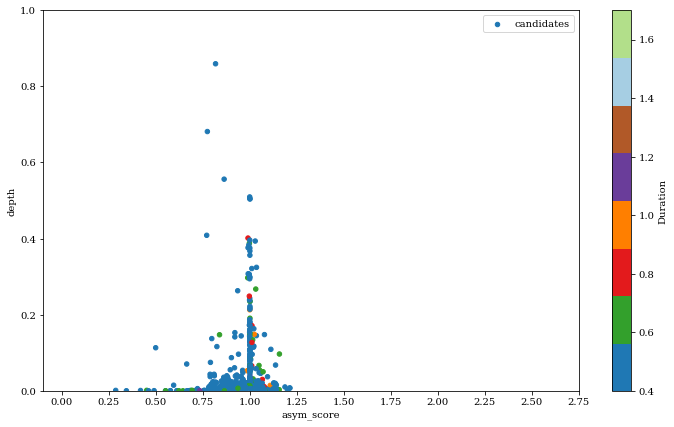

In [37]:
bin_interval = 0.1
bins = np.arange(0, np.max(data_new.duration) + bin_interval, bin_interval)

# Use np.digitize to map duration values to their corresponding bins
duration_binned = bins[np.digitize(data_new.duration, bins) - 1]


plt.scatter(data_new.asym_score,abs(data_new.depth),c=duration_binned,s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,1])
plt.xlim([-0.1,2])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20a856a050>]],
      dtype=object)

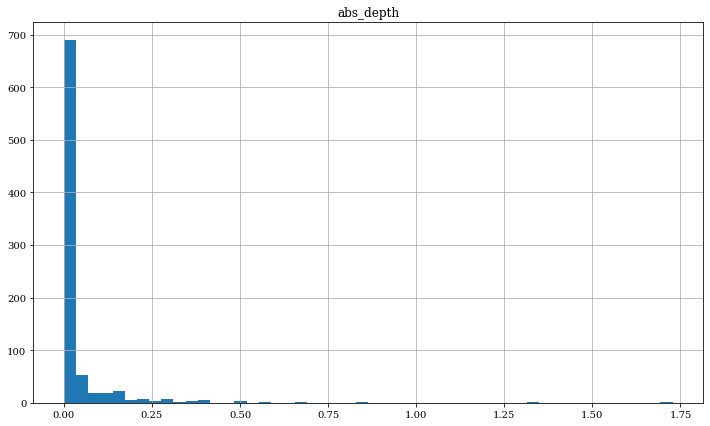

In [38]:
data_new['abs_depth'] = abs(data_new.depth)
data_new.hist('abs_depth',bins=50)

Most are low amplitude transits

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20b385df10>]],
      dtype=object)

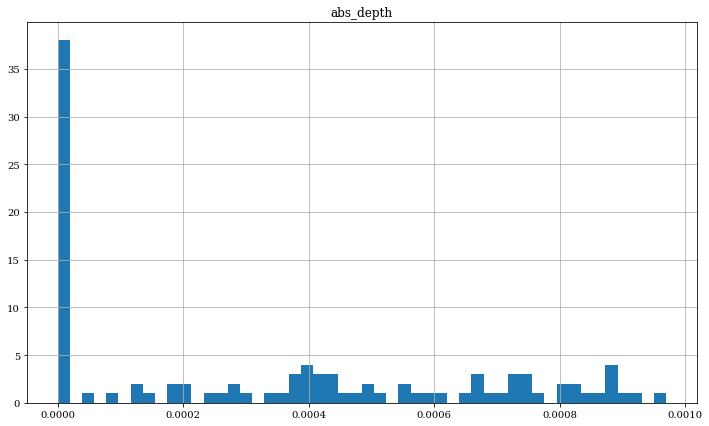

In [39]:
data_new[data_new.abs_depth <= 0.001].hist('abs_depth',bins=50)

In [40]:
data_new[data_new.abs_depth <= 0.001]

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,is_eb,is_toi,abs_depth
79,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,234116467,-16.09377,-6.55132,1486.47466,0.57567,0.00000,1.35509,26.50185,0.00000,...,83.53593,142.80709,0.00081,0.00107,0.00061,0.00084,maybeTransit,False,False,0.00000
161,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,232226413,-9.81396,-5.11938,1474.37056,0.76251,0.00000,0.00002,-29.99999,0.00000,...,1.84251,2.42135,0.00095,0.00109,0.00075,0.00084,maybeTransit,False,False,0.00030
297,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,237390567,-5.94931,-5.24189,1486.03464,0.99998,0.00014,0.12741,0.00853,43224.84705,...,1.40148,1.40146,0.00041,0.00041,0.00032,0.00032,maybeTransit,False,False,0.00043
339,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,282267615,-7.42700,-5.27489,1474.43305,0.93660,0.00000,7.43749,-29.99648,0.00000,...,3.23469,3.45834,0.00076,0.00078,0.00064,0.00066,maybeTransit,False,False,0.00000
343,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,50898809,-10.42099,-5.23923,1485.55762,1.00078,0.00027,0.28108,1.06031,1.71074,...,1.57064,1.56942,0.00018,0.00018,0.00014,0.00014,maybeTransit,False,False,0.00048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13389,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_12...,52277263,-6.32649,-5.43530,1480.43068,0.89347,0.00000,0.00000,30.00000,0.00000,...,0.42308,0.47465,0.00129,0.00137,0.00097,0.00103,maybeTransit,False,False,0.00000
13420,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_9_...,52920741,-4.35497,-5.16122,1474.40974,1.00274,0.00025,0.80227,23.56846,228.80986,...,17.53001,17.47370,0.00114,0.00114,0.00092,0.00092,maybeTransit,False,False,0.00025
13561,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_12...,52290341,-7.87437,-5.77035,1473.45413,0.86396,0.00000,6.14151,28.69808,0.00000,...,4.46778,5.49623,0.00063,0.00068,0.00049,0.00049,maybeTransit,False,False,0.00000
13746,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_9_...,33989737,-9.88956,-5.83580,1481.24459,0.82514,0.00000,8.18748,-29.99975,0.00000,...,2.11782,2.57756,0.00035,0.00039,0.00029,0.00032,maybeTransit,False,False,0.00000


In [41]:
for i in data_new[data_new.asym_score <= 0.01].path.head(10): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)
    #plt.figure(figsize=(12,5))
    #plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    #plt.title(f' TIC {lc_info[0]}')
    #plt.show()

### Make cut at `> 0.1` and `< 0` depth

In [42]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

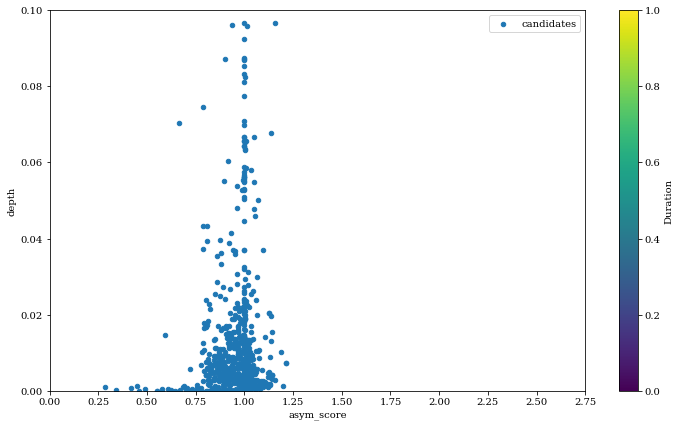

In [43]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,0.1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

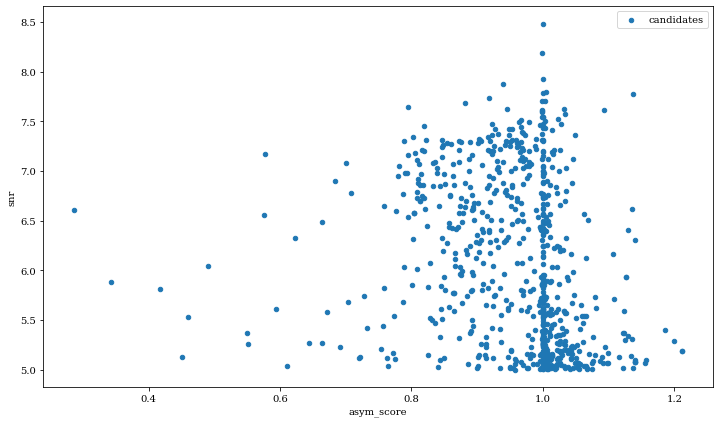

In [44]:
plt.scatter(data_new.asym_score,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('asym_score')
plt.ylabel('snr')
plt.legend()
plt.show()

- 0.1 == 10% depth
- 0.01 == 1% depth
- 0.001 == 0.1% depth

### SNR vs depth

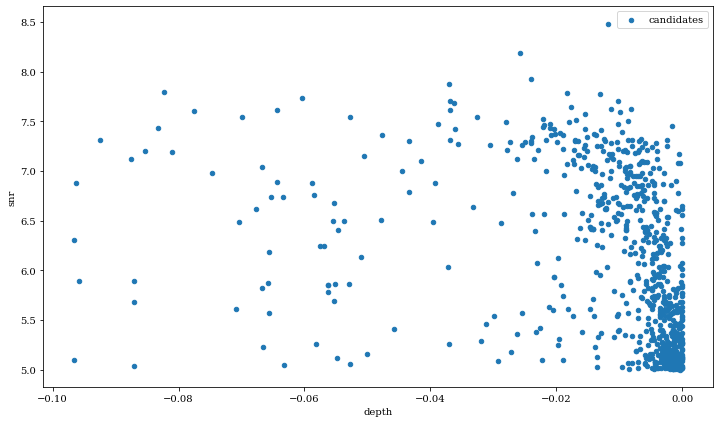

In [45]:
plt.scatter(data_new.depth,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('depth')
plt.ylabel('snr')
plt.legend()
plt.show()

## Make SOM Cutouts

In [46]:
os.getcwd()

'/home/astro/phrdhx/automated_exocomet_hunt/scripts'

In [47]:
os.chdir('../')
for i in data_new.path:
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',som_cutouts=True)
    #plt.scatter(data['TIME'],data['PDCSAP_FLUX'],s=2)